In [2]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
hr_filepath = "/Users/surya/S2/dev/experiments/HeartRate.csv"
sc_filepath = "/Users/surya/S2/dev/experiments/StepCount.csv"

In [12]:
hr_df = pd.read_csv(hr_filepath)
hr_df = hr_df.rename(columns={"value":"heart_rate"})

In [13]:
sc_df = pd.read_csv(sc_filepath)
sc_df = sc_df.rename(columns={"value":"step_count"})

In [22]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140943 entries, 0 to 140942
Data columns (total 9 columns):
sourceName       140943 non-null object
sourceVersion    140943 non-null object
device           140943 non-null object
type             140943 non-null object
unit             140943 non-null object
creationDate     140943 non-null object
startDate        140943 non-null object
endDate          140943 non-null object
heart_rate       140943 non-null float64
dtypes: float64(1), object(8)
memory usage: 9.7+ MB


In [23]:
sc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142990 entries, 0 to 142989
Data columns (total 9 columns):
sourceName       142990 non-null object
sourceVersion    142990 non-null object
device           142990 non-null object
type             142990 non-null object
unit             142990 non-null object
creationDate     142990 non-null object
startDate        142990 non-null object
endDate          142990 non-null object
step_count       142990 non-null int64
dtypes: int64(1), object(8)
memory usage: 9.8+ MB


In [48]:
def get_hr_band(hr):
    if hr > 160:
        return 3
    if hr > 120:
        return 2
    if hr > 80:
        return 1
    return 0

In [51]:
hr_df['hr_band'] = hr_df.apply(lambda x: get_hr_band(int(x["heart_rate"])), axis=1)

<Figure size 1440x864 with 0 Axes>

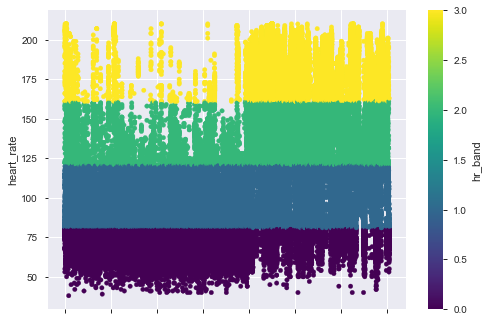

In [56]:
plt.figure(figsize=(20,12))
hr_df.reset_index().plot.scatter(x='index',
                         y='heart_rate',
                         c='hr_band',
                         colormap='viridis')

In [21]:
sc_df.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,step_count
0,Sunnie's Iphone,9.2.1,"<<HKDevice: 0x282f00320>, name:iPhone, manufac...",StepCount,count,2016-03-22 20:15:00 -0800,2016-03-22 19:02:51 -0800,2016-03-22 19:02:51 -0800,13
1,Sunnie's Iphone,9.2.1,"<<HKDevice: 0x282f000f0>, name:iPhone, manufac...",StepCount,count,2016-03-22 20:15:00 -0800,2016-03-22 20:07:13 -0800,2016-03-22 20:11:29 -0800,79
2,Sunnie's Iphone,9.2.1,"<<HKDevice: 0x282f002d0>, name:iPhone, manufac...",StepCount,count,2016-03-22 21:15:57 -0800,2016-03-22 20:11:29 -0800,2016-03-22 20:16:41 -0800,41
3,Sunnie's Iphone,9.2.1,"<<HKDevice: 0x282f019a0>, name:iPhone, manufac...",StepCount,count,2016-03-22 21:15:57 -0800,2016-03-22 20:16:41 -0800,2016-03-22 20:16:44 -0800,18
4,Sunnie's Iphone,9.2.1,"<<HKDevice: 0x282f01bd0>, name:iPhone, manufac...",StepCount,count,2016-03-22 21:15:57 -0800,2016-03-22 20:25:19 -0800,2016-03-22 20:27:37 -0800,41


In [17]:
hr_sc_df = pd.merge(hr_df[["startDate", "heart_rate"]], 
                    sc_df[["startDate", "step_count"]], 
                    left_on=["startDate"], 
                    right_on=["startDate"],
                    how = "inner")

In [19]:
hr_sc_df

,startDate,heart_rate,step_count
0,2018-05-19 14:43:10 -0800,196.0,84
1,2018-05-21 14:44:31 -0800,206.0,25
2,2018-05-22 20:49:30 -0800,154.0,90
3,2018-05-24 14:22:34 -0800,181.0,178
4,2018-05-25 16:42:53 -0800,69.0,9
...,...,...,...
611,2020-01-19 11:33:27 -0800,172.0,16
612,2020-01-19 11:44:18 -0800,185.0,49
613,2020-01-19 11:45:17 -0800,201.0,93
614,2020-01-19 12:01:56 -0800,112.0,97


In [32]:
plt.plot(hr_sc_df.heart_rate)
# plt.plot(hr_sc_df.step_count)

TypeError: scatter() missing 1 required positional argument: 'y'

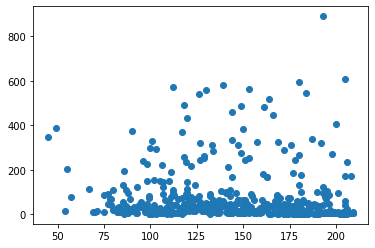

In [28]:
plt.scatter(hr_sc_df.heart_rate, hr_sc_df.step_count)

In [29]:
import pandas_profiling

/Users/surya/Utils/miniconda3/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/surya/Utils/miniconda3/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/surya/Utils/miniconda3/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/surya/Utils/miniconda3/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [30]:
pandas_profiling.ProfileReport(hr_sc_df)